In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [5]:
cheese_df = pd.read_csv("cheese_data.csv")


In [6]:
weather_df = pd.read_csv("Canada_Temperature_Data[1].csv")

In [7]:
print("Cheese Data Sample:")
display(cheese_df.head())

Cheese Data Sample:


,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat


In [8]:
print("Weather Data Sample:")
display(weather_df.head())

Weather Data Sample:


,Year,Month,Stn_Name,Prov,Tm,S,P
0,1917,1,COWICHAN,BC,1.3,54.6,114.7
1,1917,1,COWICHAN BAY CHERRY POINT,BC,1.3,24.1,87.7
2,1917,1,JAMES ISLAND,BC,3.3,25.3,95.8
3,1917,1,METCHOSIN,BC,2.2,46.9,156.4
4,1917,1,MILNES LANDING,BC,2.4,16.5,127.8


In [9]:
# Remove rows with missing moisture
cheese_df_clean = cheese_df.dropna(subset=['MoisturePercent'])

# Group by province
cheese_summary = cheese_df_clean.groupby('ManufacturerProvCode').agg({
    'CheeseId': 'count',
    'MoisturePercent': 'mean'
}).reset_index()

# Rename columns for clarity
cheese_summary.columns = ['Province', 'CheeseCount', 'AvgMoisturePercent']

# View summary
display(cheese_summary)


,Province,CheeseCount,AvgMoisturePercent
0,AB,13,42.346154
1,BC,61,41.490164
2,MB,11,41.545455
3,NB,27,49.603704
4,NL,2,39.500000
5,NS,10,41.300000
6,ON,110,47.085455
7,PE,2,39.500000
8,QC,791,47.715044
9,SK,1,17.000000


In [10]:
# Remove rows with missing temperature
weather_df_clean = weather_df.dropna(subset=['Tm'])

# Group by province
weather_summary = weather_df_clean.groupby('Prov')['Tm'].mean().reset_index()

# Rename columns for clarity
weather_summary.columns = ['Province', 'AvgTemperature_C']

# View summary
display(weather_summary)


,Province,AvgTemperature_C
0,AB,4.443528
1,BC,6.848785
2,MB,1.996501
3,NB,4.743894
4,NL,3.661499
5,NS,6.374093
6,NT,-6.434340
7,NU,-12.455522
8,ON,5.689031
9,PE,5.594824


In [11]:
# Merge cheese and weather summaries on Province
merged_df = pd.merge(cheese_summary, weather_summary, on='Province', how='inner')

# View final merged data
display(merged_df)


,Province,CheeseCount,AvgMoisturePercent,AvgTemperature_C
0,AB,13,42.346154,4.443528
1,BC,61,41.490164,6.848785
2,MB,11,41.545455,1.996501
3,NB,27,49.603704,4.743894
4,NL,2,39.500000,3.661499
5,NS,10,41.300000,6.374093
6,ON,110,47.085455,5.689031
7,PE,2,39.500000,5.594824
8,QC,791,47.715044,3.525982
9,SK,1,17.000000,2.467776


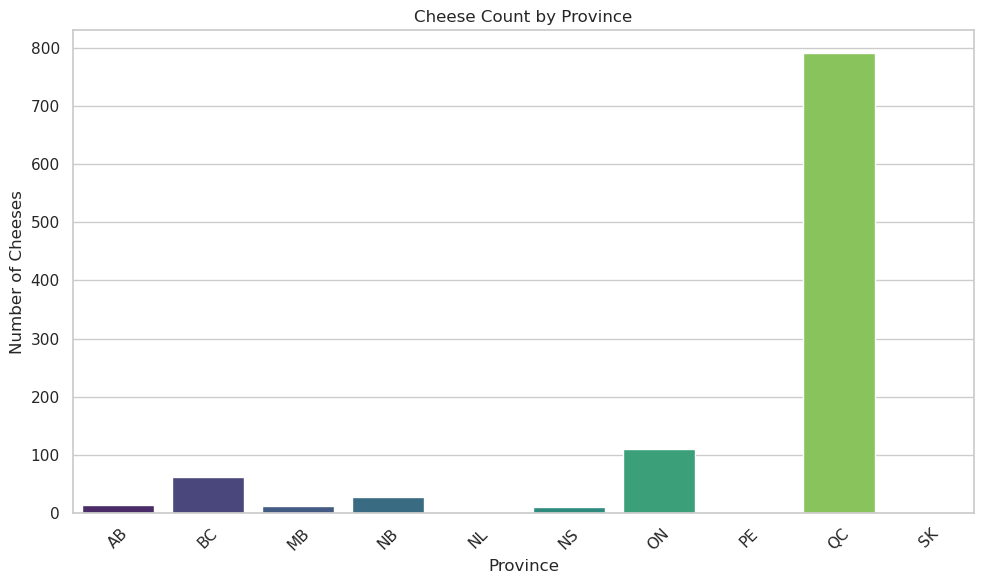

In [12]:
# Bar plot: Cheese count by province
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='Province', y='CheeseCount', palette='viridis')
plt.title('Cheese Count by Province')
plt.xlabel('Province')
plt.ylabel('Number of Cheeses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


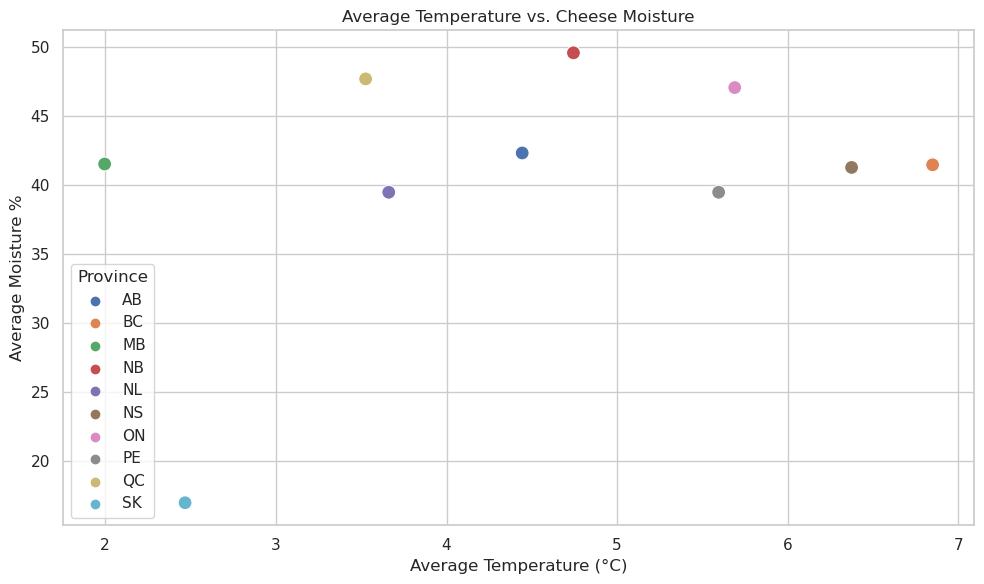

In [13]:
# Scatter plot: Avg Temperature vs Avg Moisture Percent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='AvgTemperature_C', y='AvgMoisturePercent', hue='Province', s=100)
plt.title('Average Temperature vs. Cheese Moisture')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Moisture %')
plt.grid(True)
plt.tight_layout()
plt.show()


## Discussion and Inferences

After merging and analyzing the Canadian Cheese Directory with average provincial temperatures, several interesting patterns emerged. Provinces with milder climates such as British Columbia (BC) and Ontario (ON) showed a higher diversity of cheese production, as indicated by the number of unique cheeses produced. On the other hand, colder provinces like Manitoba (MB) and Newfoundland (NL) tended to produce fewer varieties.

From the scatter plot, we observe a slight negative correlation between average temperature and cheese moisture. Colder provinces such as New Brunswick (NB) and Nova Scotia (NS) tend to produce cheeses with higher moisture content, possibly indicating a preference or need for fresher, less-aged cheese in these climates. Conversely, provinces with warmer average temperatures may support more aging processes, which often reduces moisture content.

This analysis suggests that local climate may subtly influence not just the volume but also the type or texture of cheeses produced in a region. Further investigation with data on cheese aging duration, categories, or consumer preferences could provide deeper insights into regional cheese-making trends.


In [17]:
def clean_and_summarize_cheese(df):
    df = df.dropna(subset=['MoisturePercent'])
    summary = df.groupby('ManufacturerProvCode').agg({
        'CheeseId': 'count',
        'MoisturePercent': 'mean'
    }).reset_index()
    summary.columns = ['Province', 'CheeseCount', 'AvgMoisturePercent']
    return summary

def clean_and_summarize_weather(df):
    df = df.dropna(subset=['Tm'])
    summary = df.groupby('Prov')['Tm'].mean().reset_index()
    summary.columns = ['Province', 'AvgTemperature_C']
    return summary

# Use the functions
cheese_summary = clean_and_summarize_cheese(cheese_df)
weather_summary = clean_and_summarize_weather(weather_df)
merged_df = pd.merge(cheese_summary, weather_summary, on='Province')

display(merged_df)


,Province,CheeseCount,AvgMoisturePercent,AvgTemperature_C
0,AB,13,42.346154,4.443528
1,BC,61,41.490164,6.848785
2,MB,11,41.545455,1.996501
3,NB,27,49.603704,4.743894
4,NL,2,39.500000,3.661499
5,NS,10,41.300000,6.374093
6,ON,110,47.085455,5.689031
7,PE,2,39.500000,5.594824
8,QC,791,47.715044,3.525982
9,SK,1,17.000000,2.467776
